In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,I Saw Mommy Kissing Santa Claus,2002
1,"Bikini-Blitzkrieg, Part One: Dance Domination",2006
2,Kirk kulok siri,1992
3,The Story of Jonah and the Whale (Sort of...),2010
4,Church of Redemption,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [41]:
c=cast
c=c[(c.character=='Superman') | (c.character=='Batman')]
c.head()

,title,year,name,type,character,n
909,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1
14858,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Batman,NaN
14884,Justice League Part Two,2019,Ben Affleck,actor,Batman,NaN
14900,Suicide Squad,2016,Ben Affleck,actor,Batman,NaN
14906,The Justice League Part One,2017,Ben Affleck,actor,Batman,NaN


In [45]:
g = c.groupby(['year','character']).size()
g.head()

year  character
1938  Batman       1
1940  Batman       1
1943  Batman       1
1948  Superman     1
1949  Batman       2
dtype: int64

In [47]:
df = g.unstack().fillna(0)
df.head()

character,Batman,Superman
year,,
1938,1,0
1940,1,0
1943,1,0
1948,0,1
1949,2,0


In [48]:
df = df[df.Superman>df.Batman]
df

character,Batman,Superman
year,,
1948,0,1
1950,0,1
1951,0,2
1954,0,5
1955,0,1
1973,1,2
1978,0,2
1980,0,2
1983,0,2


In [49]:
len(df)

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [50]:
df = g.unstack().fillna(0)
df = df[df.Superman < df.Batman]
len(df)

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [57]:
c = cast
g = c.groupby(['year','type']).size() 
g

year  type   
1894  actor        2
      actress      1
1900  actor        2
1905  actor        1
1906  actor       14
      actress      3
1907  actor        5
1908  actor       29
      actress     13
1909  actor        3
1910  actor       46
      actress     24
1911  actor      136
      actress     64
1912  actor      241
...
2015  actor      122452
      actress     72273
2016  actor       36721
      actress     22159
2017  actor        2266
      actress      1344
2018  actor         294
      actress       192
2019  actor          70
      actress        28
2020  actor          44
      actress        19
2021  actor          13
      actress         2
2022  actor           3
Length: 235, dtype: int64

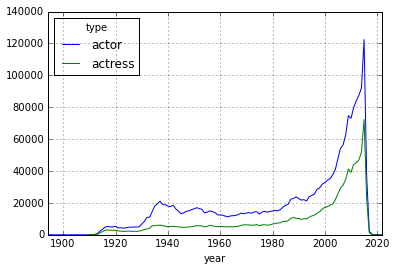

In [58]:
g = g.unstack('type')
g.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

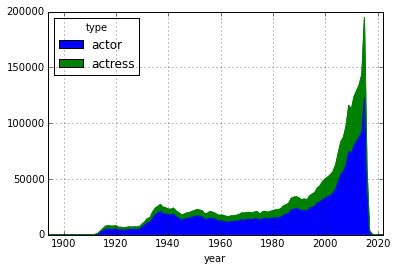

In [59]:
g.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [60]:
c = cast
g = c.groupby(['year','type']).size() 
g

year  type   
1894  actor        2
      actress      1
1900  actor        2
1905  actor        1
1906  actor       14
      actress      3
1907  actor        5
1908  actor       29
      actress     13
1909  actor        3
1910  actor       46
      actress     24
1911  actor      136
      actress     64
1912  actor      241
...
2015  actor      122452
      actress     72273
2016  actor       36721
      actress     22159
2017  actor        2266
      actress      1344
2018  actor         294
      actress       192
2019  actor          70
      actress        28
2020  actor          44
      actress        19
2021  actor          13
      actress         2
2022  actor           3
Length: 235, dtype: int64

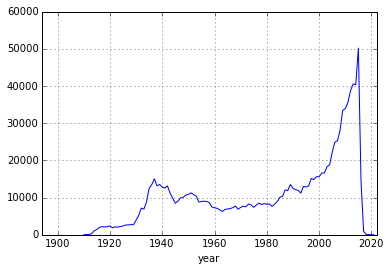

In [61]:
g = g.unstack('type')
(g.actor - g.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

In [62]:
c = cast
g = c.groupby(['year','type']).size() 
g

year  type   
1894  actor        2
      actress      1
1900  actor        2
1905  actor        1
1906  actor       14
      actress      3
1907  actor        5
1908  actor       29
      actress     13
1909  actor        3
1910  actor       46
      actress     24
1911  actor      136
      actress     64
1912  actor      241
...
2015  actor      122452
      actress     72273
2016  actor       36721
      actress     22159
2017  actor        2266
      actress      1344
2018  actor         294
      actress       192
2019  actor          70
      actress        28
2020  actor          44
      actress        19
2021  actor          13
      actress         2
2022  actor           3
Length: 235, dtype: int64

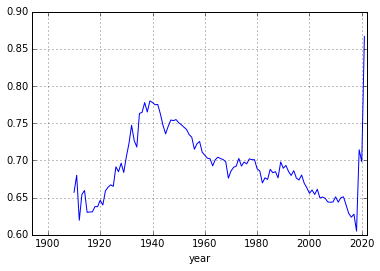

In [65]:
g = g.unstack('type')
(g.actor / (g.actor + g.actress)).plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

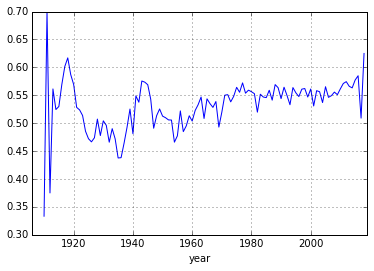

In [66]:
c = cast
c = c[c.n == 2]
g = c.groupby(['year','type']).size() 
g = g.unstack('type')
(g.actor / (g.actor + g.actress)).plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

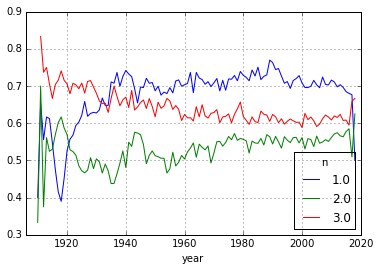

In [70]:
c = cast
c = c[c.n <= 3]
g = c.groupby(['year', 'type', 'n']).size() 
g = g.unstack('type')
r = (g.actor / (g.actor + g.actress))
r.unstack('n').plot()
